<a href="https://colab.research.google.com/github/izdendamir5-glitch/dadsada/blob/main/Group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adilzhan

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re   # <-- added for year extraction

all_movies_data = []
print("Empty list 'all_movies_data' created.")

base_url = "https://kinogo.am"

for page_num in range(1, 1001):

    if page_num == 1:
        url = base_url
    else:
        url = f"{base_url}/page/{page_num}/"

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, "html.parser")

        shortstories = soup.find_all("div", class_="shortstory")

        if not shortstories:
            print(f"No 'shortstory' blocks found on page {page_num}. Stopping.")
            break

        for story in shortstories:

            # ---- Title ----
            title_block = story.find("div", class_="shortstory__title")
            title_h2 = title_block.find("h2") if title_block else None
            title = title_h2.text.strip() if title_h2 else None

            # ---- KP rating ----
            kp_block = story.find("span", class_="kp")
            kp = kp_block.text.replace("KP ", "").strip() if kp_block else None

            # ---- IMDb rating ----
            imdb_block = story.find("span", class_="imdb")
            imdb = imdb_block.text.replace("IMDB ", "").strip() if imdb_block else None

            # ---- YEAR extraction ----
            info_block = story.find("div", class_="shortstory__info")
            info_text = info_block.text.strip() if info_block else ""

            # Extract first 4-digit number (likely year)
            year_match = re.search(r"\b(19|20)\d{2}\b", info_text)
            year = year_match.group(0) if year_match else None

            all_movies_data.append({
                "Название фильма": title,
                "Год": year,
                "Рейтинг KP": kp,
                "Рейтинг IMDB": imdb
            })

        print(f"Scraped page {page_num}. Total movies: {len(all_movies_data)}")

    except requests.exceptions.RequestException as e:
        print(f"Request error on page {page_num}: {e}")
        break
    except Exception as e:
        print(f"Unexpected error on page {page_num}: {e}")

    time.sleep(0.05)

print(f"\nFinished scraping. Total movies collected: {len(all_movies_data)}")

Adilzhan = pd.DataFrame(all_movies_data)

print("\nFirst 5 rows:")
display(Adilzhan.head())

print("\nLast 5 rows:")
display(Adilzhan.tail())

print(f"\nShape of DataFrame: {Adilzhan.shape}")

Empty list 'all_movies_data' created.
Scraped page 1. Total movies: 10
Scraped page 2. Total movies: 20
Scraped page 3. Total movies: 30
Scraped page 4. Total movies: 40
Scraped page 5. Total movies: 50
Scraped page 6. Total movies: 60
Scraped page 7. Total movies: 70
Scraped page 8. Total movies: 80
Scraped page 9. Total movies: 90
Scraped page 10. Total movies: 100
Scraped page 11. Total movies: 110
Scraped page 12. Total movies: 120
Scraped page 13. Total movies: 130
Scraped page 14. Total movies: 140
Scraped page 15. Total movies: 150
Scraped page 16. Total movies: 160
Scraped page 17. Total movies: 170
Scraped page 18. Total movies: 180
Scraped page 19. Total movies: 190
Scraped page 20. Total movies: 200
Scraped page 21. Total movies: 210
Scraped page 22. Total movies: 220
Scraped page 23. Total movies: 230
Scraped page 24. Total movies: 240
Scraped page 25. Total movies: 250
Scraped page 26. Total movies: 260
Scraped page 27. Total movies: 270
Scraped page 28. Total movies: 280


,Название фильма,Год,Рейтинг KP,Рейтинг IMDB
0,Зверополис 2 (2025),2025,8.0,7.7
1,Хищник: Пустоши (2025),2025,7.5,7.4
2,Охота за тенью (2025),2025,7.2,7.2
3,Франкенштейн (2025),2025,7.5,7.5
4,Гарри Поттер и философский камень (2001),2001,8.3,7.7



Last 5 rows:


,Название фильма,Год,Рейтинг KP,Рейтинг IMDB
9995,Жизнь после праздника (2021),2021,6.0,5.8
9996,Кафе «Плоть» (1982),1982,5.7,6.2
9997,Взрыв скоростного поезда (2025),2025,6.5,6.2
9998,Про бизнесмена Фому (1993),1993,7.1,6.1
9999,Адское лето (2023),2023,5.3,5.3



Shape of DataFrame: (10000, 4)


Damir
Amirzhan

In [ ]:
# Data inspection
print("\nFirst 5 rows:")
print(Adilzhan.head())  # Display the first 5 rows

print("\nDataFrame Info:")
Adilzhan.info()  # Shows the data types and non-null counts

print("\nDescriptive statistics:")
print(Adilzhan.describe())  # Get statistical summary for numeric columns



First 5 rows:
                            Название фильма   Год Рейтинг KP Рейтинг IMDB
0                       Зверополис 2 (2025)  2025        8.0          7.7
1                    Хищник: Пустоши (2025)  2025        7.5          7.4
2                     Охота за тенью (2025)  2025        7.2          7.2
3                       Франкенштейн (2025)  2025        7.5          7.5
4  Гарри Поттер и философский камень (2001)  2001        8.3          7.7

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Название фильма  10000 non-null  object
 1   Год              10000 non-null  object
 2   Рейтинг KP       9330 non-null   object
 3   Рейтинг IMDB     9479 non-null   object
dtypes: object(4)
memory usage: 312.6+ KB

Descriptive statistics:
               Название фильма    Год Рейтинг KP Рейтинг IMDB
count             

In [ ]:
# Identifying missing values
print("\nMissing values:")
print(Adilzhan.isnull().sum())  # Show missing values for each column

# Check for wrong data types
print("\nData types:")
print(Adilzhan.dtypes)  # Data types of each column

# Check for duplicates
print("\nDuplicate rows:")
print(Adilzhan.duplicated().sum())  # Check for duplicate rows



Missing values:
Название фильма      0
Год                  0
Рейтинг KP         670
Рейтинг IMDB       521
dtype: int64

Data types:
Название фильма    object
Год                object
Рейтинг KP         object
Рейтинг IMDB       object
dtype: object

Duplicate rows:
552


In [ ]:
# Convert ratings to numeric (if possible)
Adilzhan['Рейтинг KP'] = pd.to_numeric(Adilzhan['Рейтинг KP'], errors='coerce')
Adilzhan['Рейтинг IMDB'] = pd.to_numeric(Adilzhan['Рейтинг IMDB'], errors='coerce')


In [ ]:
# Clean text fields (strip, lowercase)
Adilzhan['Название фильма'] = Adilzhan['Название фильма'].str.strip().str.lower()


In [ ]:
# Fill missing values for 'Рейтинг KP' and 'Рейтинг IMDB'
Adilzhan['Рейтинг KP'].fillna(Adilzhan['Рейтинг KP'].median(), inplace=True)
Adilzhan['Рейтинг IMDB'].fillna(Adilzhan['Рейтинг IMDB'].median(), inplace=True)

# Fill missing values for 'Год' (Year) with the most frequent year
Adilzhan['Год'].fillna(Adilzhan['Год'].mode()[0], inplace=True)

# Check missing values again
print("\nMissing values after cleaning:")
print(Adilzhan.isnull().sum())



Missing values after cleaning:
Название фильма    0
Год                0
Рейтинг KP         0
Рейтинг IMDB       0
dtype: int64


/tmp/ipython-input-2718045064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Adilzhan['Рейтинг KP'].fillna(Adilzhan['Рейтинг KP'].median(), inplace=True)
/tmp/ipython-input-2718045064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# Remove duplicate rows
Adilzhan.drop_duplicates(inplace=True)


In [ ]:
# Remove outliers for 'Рейтинг KP' and 'Рейтинг IMDB'
Adilzhan = Adilzhan[(Adilzhan['Рейтинг KP'] >= 1) & (Adilzhan['Рейтинг KP'] <= 10)]
Adilzhan = Adilzhan[(Adilzhan['Рейтинг IMDB'] >= 1) & (Adilzhan['Рейтинг IMDB'] <= 10)]


In [ ]:
# Create a derived column: rating difference
Adilzhan['Рейтинг разница'] = Adilzhan['Рейтинг KP'] - Adilzhan['Рейтинг IMDB']


In [ ]:
# Re-inspect the cleaned data
print("\nFirst 5 rows after cleaning:")
print(Adilzhan.head())

print("\nData types after cleaning:")
print(Adilzhan.dtypes)  # Verify data types

print("\nDuplicate rows after cleaning:")
print(Adilzhan.duplicated().sum())  # Ensure no duplicates

# Final shape of the DataFrame
print(f"\nShape of cleaned DataFrame: {Adilzhan.shape}")



First 5 rows after cleaning:
                            Название фильма   Год  Рейтинг KP  Рейтинг IMDB  \
0                       зверополис 2 (2025)  2025         8.0           7.7   
1                    хищник: пустоши (2025)  2025         7.5           7.4   
2                     охота за тенью (2025)  2025         7.2           7.2   
3                       франкенштейн (2025)  2025         7.5           7.5   
4  гарри поттер и философский камень (2001)  2001         8.3           7.7   

   Рейтинг разница  
0              0.3  
1              0.1  
2              0.0  
3              0.0  
4              0.6  

Data types after cleaning:
Название фильма     object
Год                 object
Рейтинг KP         float64
Рейтинг IMDB       float64
Рейтинг разница    float64
dtype: object

Duplicate rows after cleaning:
0

Shape of cleaned DataFrame: (9448, 5)


Dastan


In [ ]:
# Descriptive statistics
print("\nDescriptive statistics for ratings and year:")
print(Adilzhan['Рейтинг KP'].describe())
print(Adilzhan['Рейтинг IMDB'].describe())
print(Adilzhan['Год'].value_counts())



Descriptive statistics for ratings and year:
count    9448.000000
mean        6.650837
std         0.950038
min         1.500000
25%         6.100000
50%         6.700000
75%         7.300000
max         9.300000
Name: Рейтинг KP, dtype: float64
count    9448.000000
mean        6.217358
std         1.075845
min         1.500000
25%         5.600000
50%         6.300000
75%         6.900000
max         9.600000
Name: Рейтинг IMDB, dtype: float64
Год
2025    771
2024    623
2023    464
2022    446
2021    382
       ... 
1952      1
1951      1
1946      1
1943      1
1949      1
Name: count, Length: 86, dtype: int64


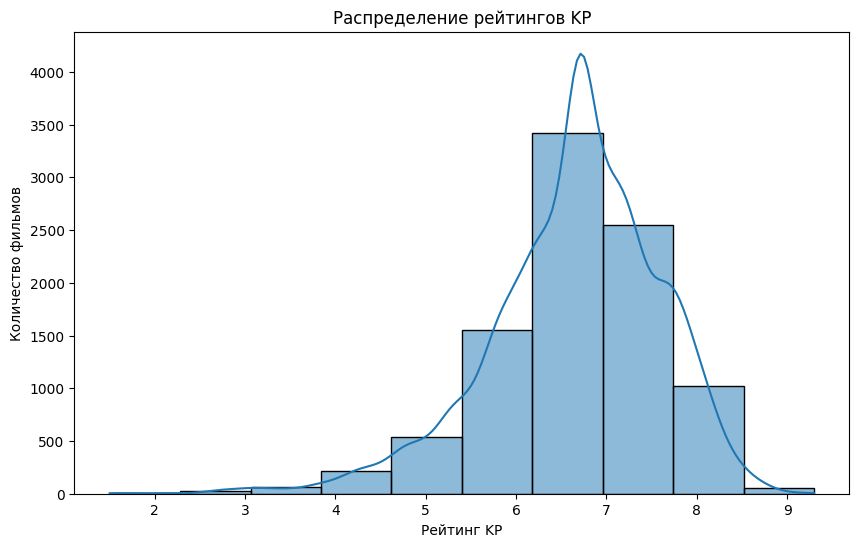

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution for 'Рейтинг KP'
plt.figure(figsize=(10, 6))
sns.histplot(Adilzhan['Рейтинг KP'], bins=10, kde=True)
plt.title("Распределение рейтингов KP")
plt.xlabel('Рейтинг KP')
plt.ylabel('Количество фильмов')
plt.show()


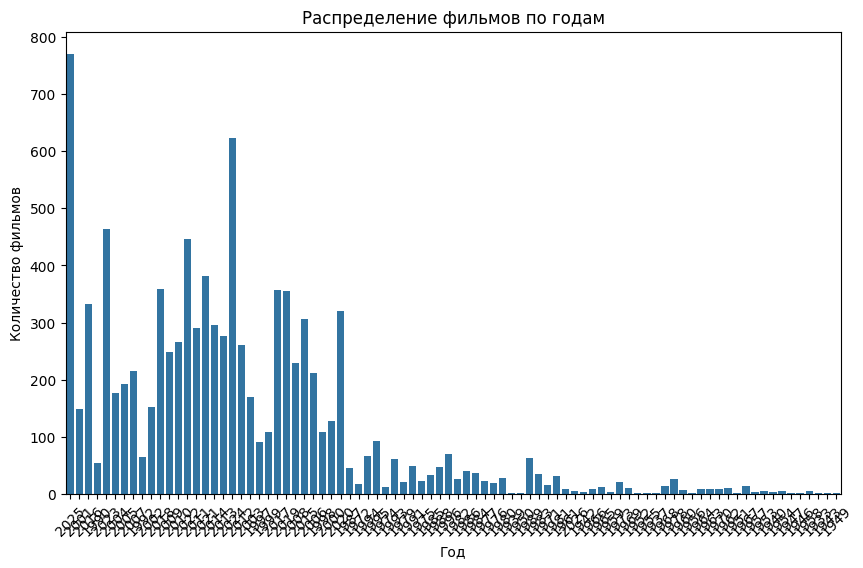

In [ ]:
# Year distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Adilzhan, x='Год')
plt.title("Распределение фильмов по годам")
plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()


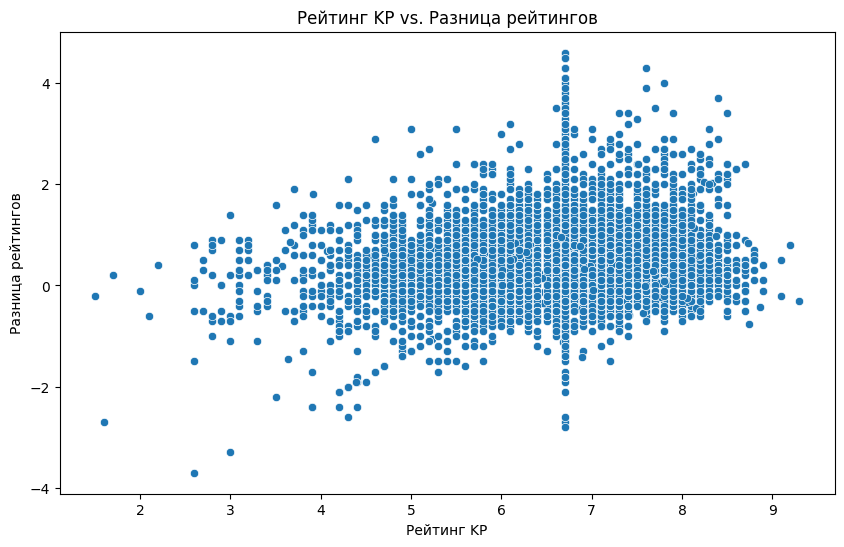

In [ ]:
# Assuming 'Discount' is available or calculated
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Adilzhan, x='Рейтинг KP', y='Рейтинг разница')
plt.title("Рейтинг KP vs. Разница рейтингов")
plt.xlabel('Рейтинг KP')
plt.ylabel('Разница рейтингов')
plt.show()


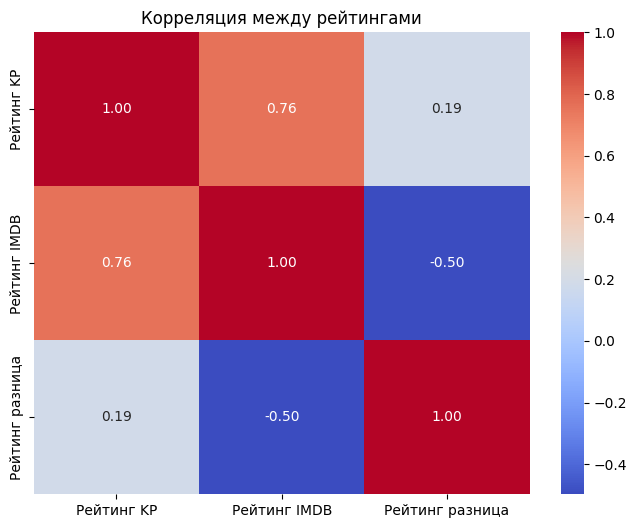

In [ ]:
# Correlation matrix between numerical columns
corr_matrix = Adilzhan[['Рейтинг KP', 'Рейтинг IMDB', 'Рейтинг разница']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между рейтингами")
plt.show()


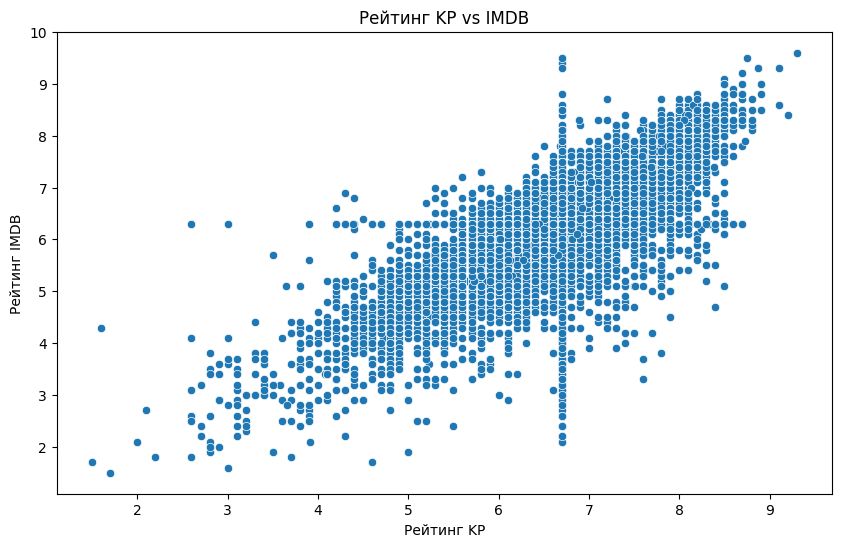

In [ ]:
# Plot price vs rating (if price data exists)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Adilzhan, x='Рейтинг KP', y='Рейтинг IMDB')
plt.title("Рейтинг KP vs IMDB")
plt.xlabel('Рейтинг KP')
plt.ylabel('Рейтинг IMDB')
plt.show()


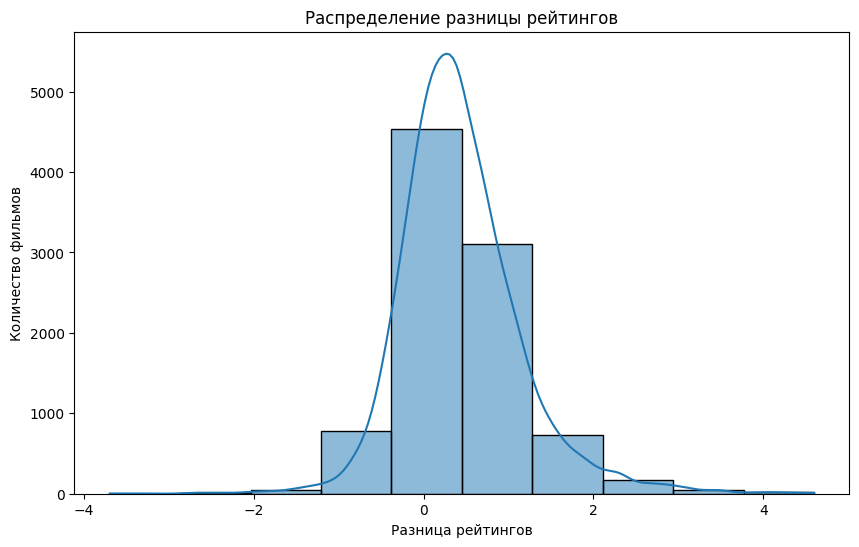

In [ ]:
# Rating difference histogram
plt.figure(figsize=(10, 6))
sns.histplot(Adilzhan['Рейтинг разница'], bins=10, kde=True)
plt.title("Распределение разницы рейтингов")
plt.xlabel('Разница рейтингов')
plt.ylabel('Количество фильмов')
plt.show()


Amirzhan


In [ ]:
highest_rated_movie = Adilzhan.loc[Adilzhan['Рейтинг IMDB'].idxmax()]
print("\nФильм с самым высоким рейтингом:")
print(highest_rated_movie[['Название фильма', 'Рейтинг IMDB']])


Фильм с самым высоким рейтингом:
Название фильма    уровень тревоги: полночь (2011)
Рейтинг IMDB                                   9.6
Name: 6988, dtype: object


In [ ]:
lowest_rated_movie = Adilzhan.loc[Adilzhan['Рейтинг IMDB'].idxmin()]
print("\nФильм с самым низким рейтингом:")
print(lowest_rated_movie[['Название фильма', 'Рейтинг IMDB']])


Фильм с самым низким рейтингом:
Название фильма    охотник против чужого: поединок (2007)
Рейтинг IMDB                                          1.5
Name: 6229, dtype: object


In [ ]:
# Год с максимальным количеством фильмов
most_movies_year = Adilzhan['Год'].value_counts().idxmax()

print(f"\nГод с максимальным количеством фильмов: {most_movies_year}")



Год с максимальным количеством фильмов: 2025


In [ ]:
# Год с наименьшим количеством фильмов
least_movies_year = Adilzhan['Год'].value_counts().idxmin()

print(f"\nГод с наименьшим количеством фильмов: {least_movies_year}")



Год с наименьшим количеством фильмов: 1955


In [ ]:
# Год с самым высоким средним рейтингом
average_ratings_per_year = Adilzhan.groupby('Год')['Рейтинг IMDB'].mean()
highest_average_rating_year = average_ratings_per_year.idxmax()

print(f"\nГод с самым высоким средним рейтингом фильмов: {highest_average_rating_year}")



Год с самым высоким средним рейтингом фильмов: 1946


In [ ]:
# Год с самым низким средним рейтингом
average_ratings_per_year = Adilzhan.groupby('Год')['Рейтинг IMDB'].mean()
lowest_average_rating_year = average_ratings_per_year.idxmin()  # Используем idxmin для нахождения минимального значения

# Выводим результат
print(f"\nГод с самым низким средним рейтингом фильмов: {lowest_average_rating_year}")



Год с самым низким средним рейтингом фильмов: 2026


In [ ]:
# Convert ratings to numeric (in case they are not)
df['Рейтинг KP'] = pd.to_numeric(df['Рейтинг KP'], errors='coerce')
df['Рейтинг IMDB'] = pd.to_numeric(df['Рейтинг IMDB'], errors='coerce')

# Group by 'Год' and sum both KP and IMDB ratings
df['Total Rating'] = df['Рейтинг KP'] + df['Рейтинг IMDB']

# Group by 'Год' and sum the total ratings per year
total_ratings_per_year = df.groupby('Год')['Total Rating'].sum()

# Find the year with the maximum total rating
year_with_max_total_rating = total_ratings_per_year.idxmax()

# Print the result
print(f"Year with the highest total rating: {year_with_max_total_rating}")


Year with the highest total rating: 1927
